# Time Series Transformation

In [11]:
from pandas import read_csv, Series
from matplotlib.pyplot import figure, xticks, show
from ts_functions import plot_series, HEIGHT

%run p00_settings.ipynb

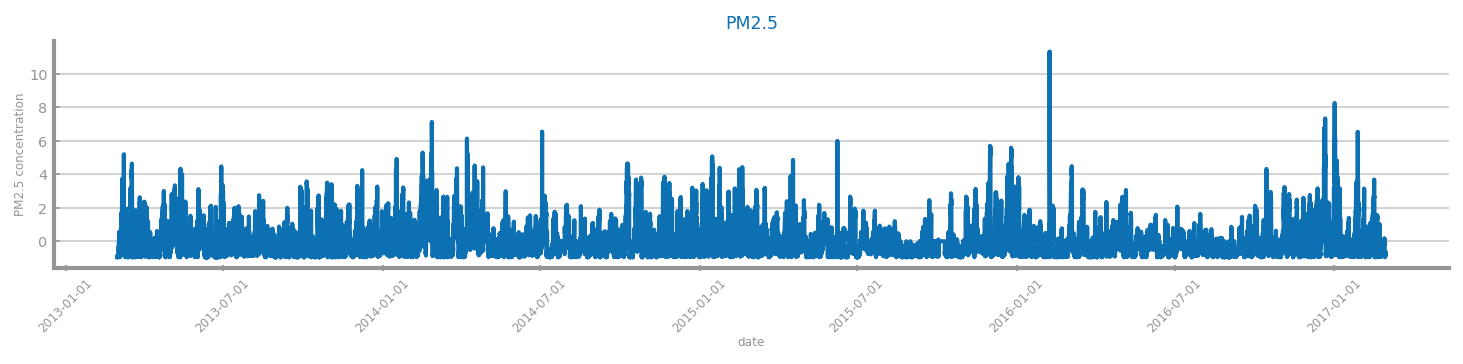

In [12]:
data = read_csv(project_path + prepared_out_data_file, index_col=time_var, sep=',', decimal='.', parse_dates=True, infer_datetime_format=True)

figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(data[target], x_label=time_var, y_label='PM2.5 concentration', title=target)
xticks(rotation = 45)
show()

# Smoothing

(array([734869., 735050., 735234., 735415., 735599., 735780., 735964.,
        736146., 736330.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

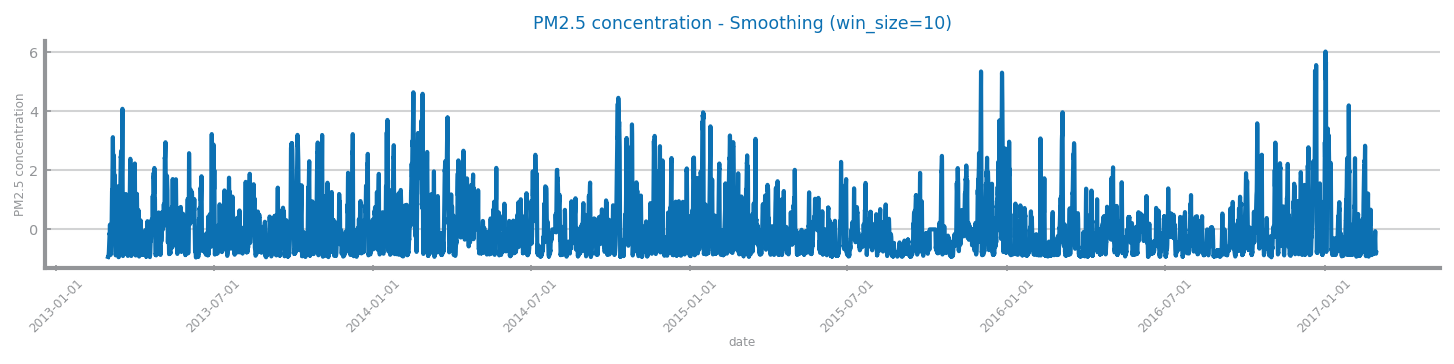

In [13]:
WIN_SIZE = 10
rolling_multi = data.rolling(window=WIN_SIZE)
smooth_df_10_multi = rolling_multi.mean()
figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(smooth_df_10_multi[target], title=f'PM2.5 concentration - Smoothing (win_size={WIN_SIZE})', x_label=time_var, y_label='PM2.5 concentration')
xticks(rotation = 45)

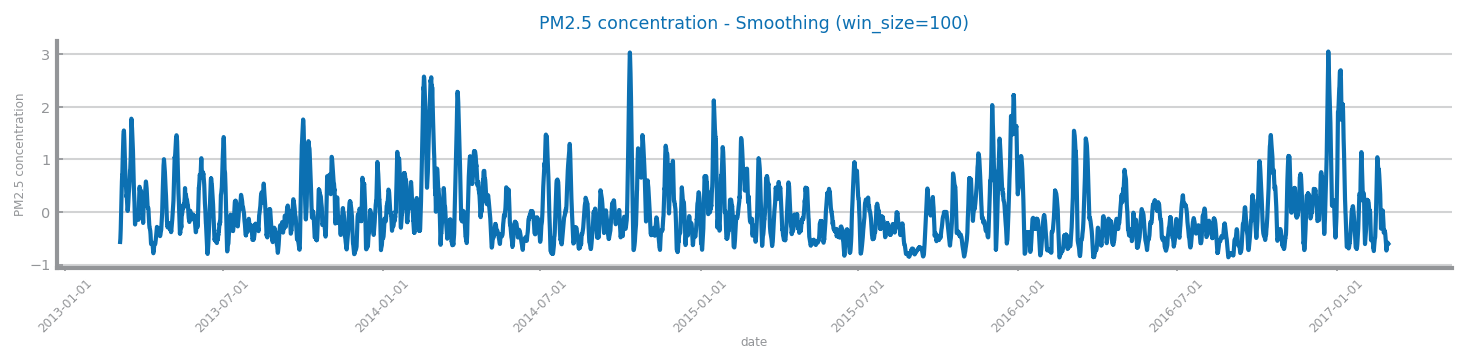

In [14]:
WIN_SIZE = 100
rolling_multi = data.rolling(window=WIN_SIZE)
smooth_df_100_multi = rolling_multi.mean()
figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(smooth_df_100_multi[target], title=f'PM2.5 concentration - Smoothing (win_size={WIN_SIZE})', x_label=time_var, y_label='PM2.5 concentration')
xticks(rotation = 45)

show()

# Aggregation

In [15]:
def aggregate_by(data: Series, index_var: str, period: str):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    return agg_df

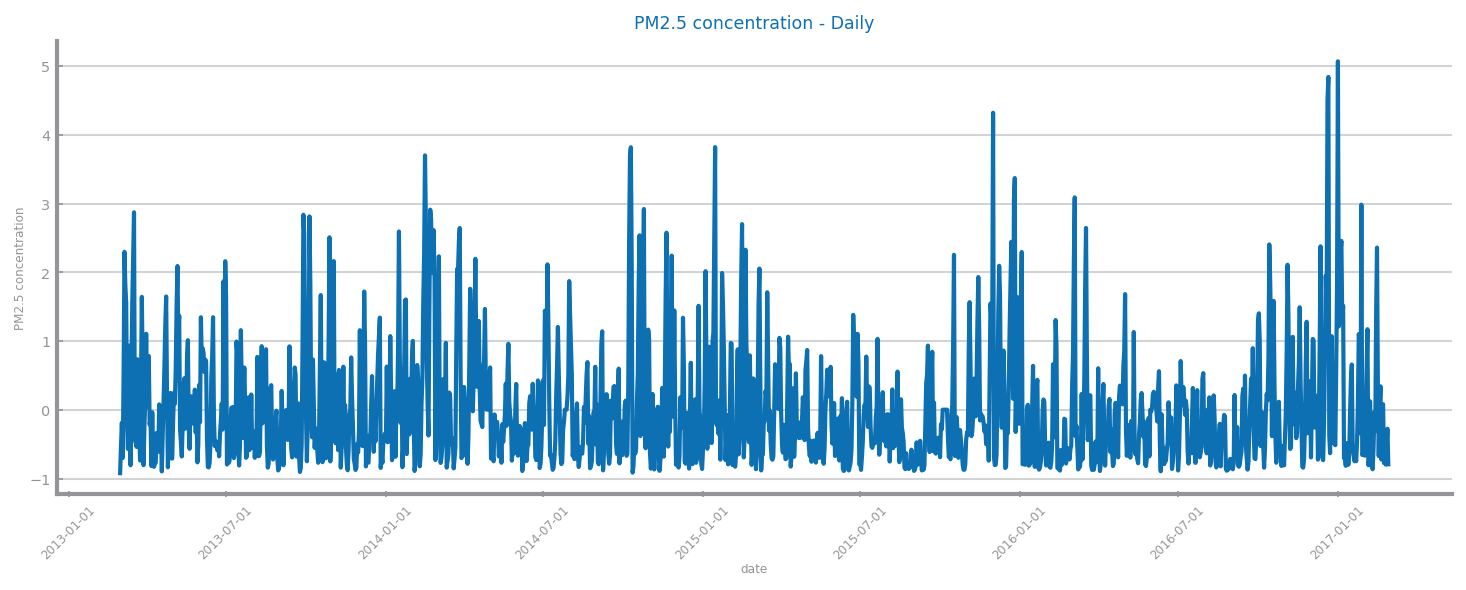

In [16]:
figure(figsize=(3*HEIGHT, HEIGHT))
agg_multi_D_df = aggregate_by(data, time_var, 'D')
plot_series(agg_multi_D_df[target], title='PM2.5 concentration - Daily', x_label=time_var, y_label='PM2.5 concentration')
xticks(rotation = 45)
show()

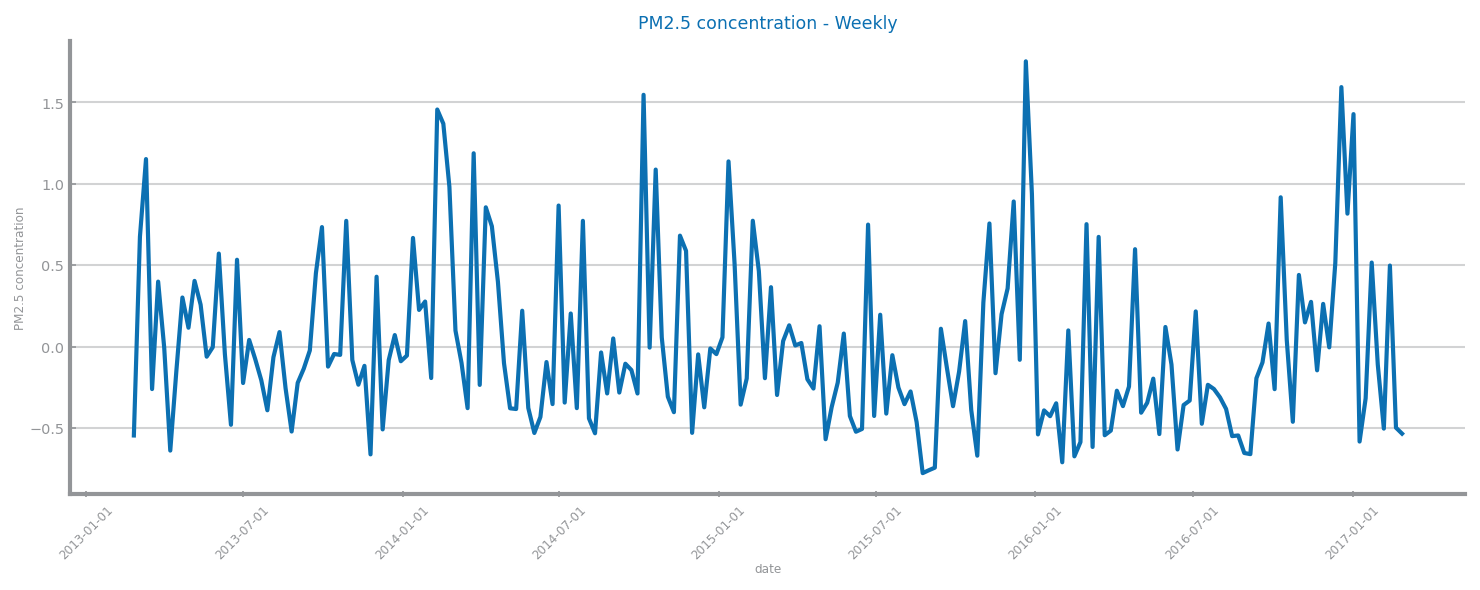

In [17]:
figure(figsize=(3*HEIGHT, HEIGHT))
agg_multi_W_df = aggregate_by(data, time_var, 'W')
plot_series(agg_multi_W_df[target], title='PM2.5 concentration - Weekly', x_label=time_var, y_label='PM2.5 concentration')
xticks(rotation = 45)
show()

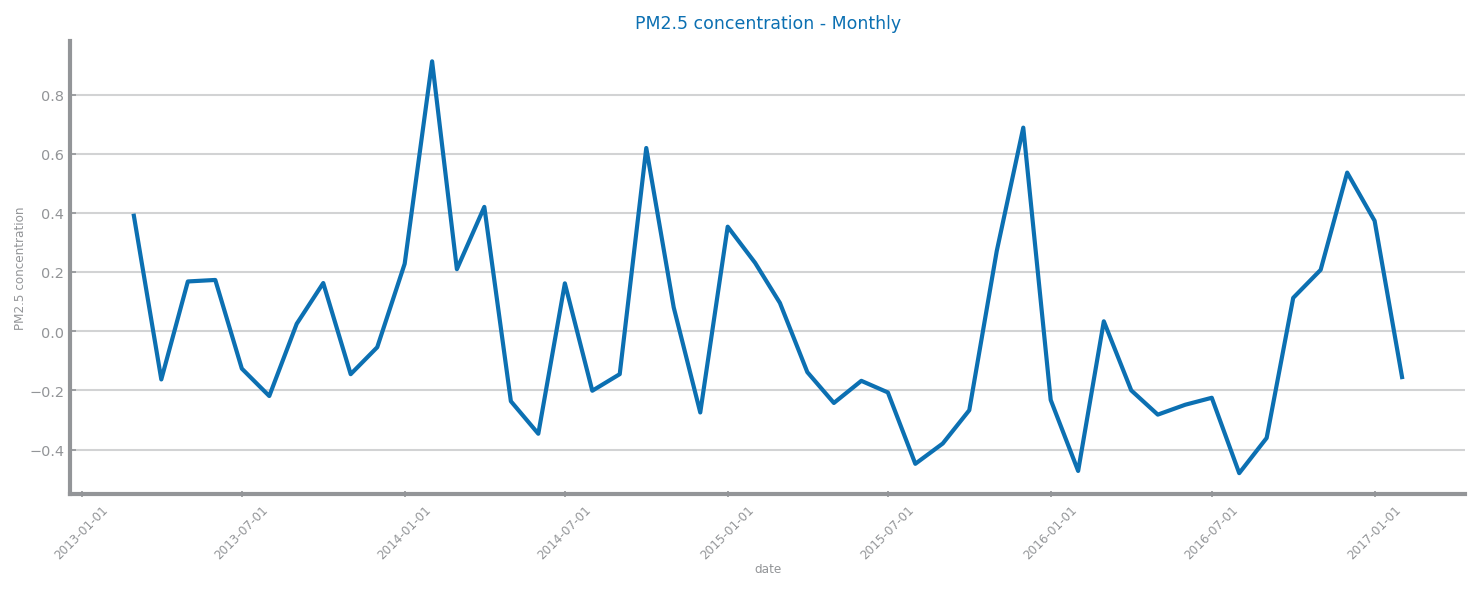

In [18]:
figure(figsize=(3*HEIGHT, HEIGHT))
agg_multi_M_df = aggregate_by(data, time_var, 'M')
plot_series(agg_multi_M_df[target], title='PM2.5 concentration - Monthly', x_label=time_var, y_label='PM2.5 concentration')
xticks(rotation = 45)
show()

# Differentiation

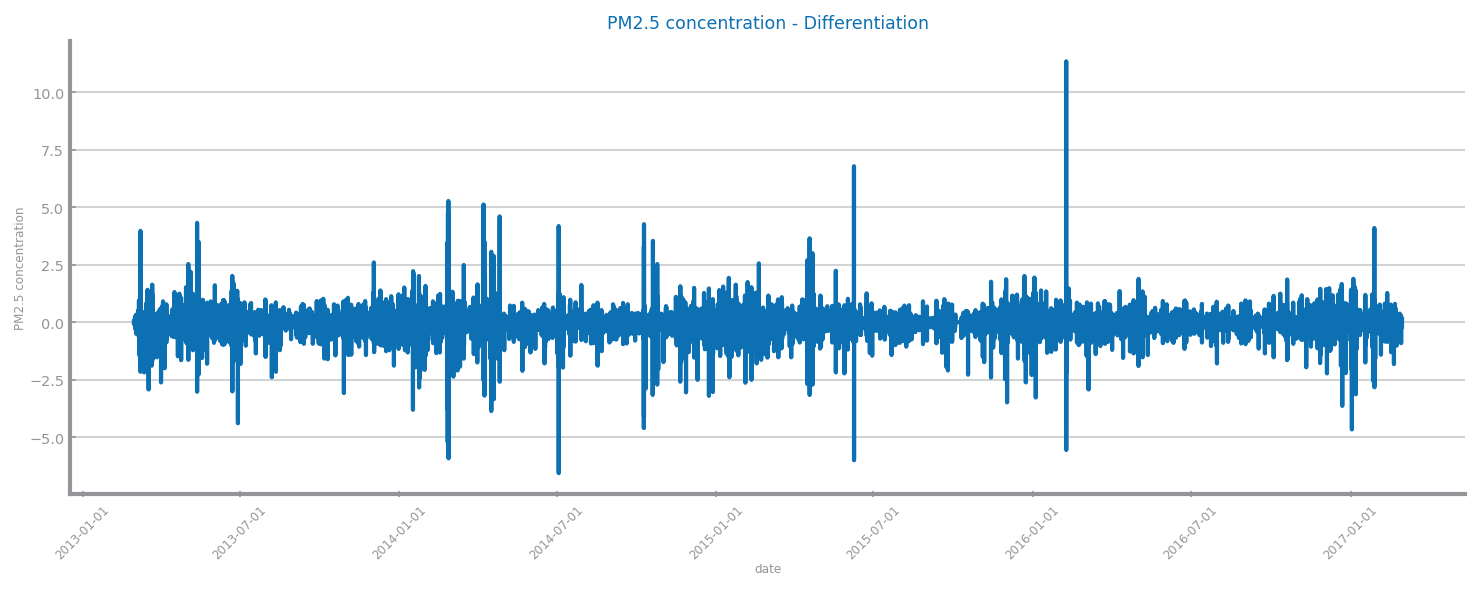

In [19]:
diff_df_multi = data.diff()
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(diff_df_multi[target], title='PM2.5 concentration - Differentiation', x_label=time_var, y_label='PM2.5 concentration')
xticks(rotation = 45)
show()

# Export DataFrame to CSV:

In [20]:
exec('data_ts_transf =' + ts_transf_df)

data_ts_transf.to_csv(project_path + ts_transf_data_file, index=True)